### PCA Application

In [1]:
import numpy as np
import pandas as pd
import cufflinks as cf
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

sns.set_theme(style ='whitegrid', palette ='muted', rc = {'figure.figsize': (15,10)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/unsupervised_sprint/acs2015_county_data.csv', encoding="UTF-8").dropna()
df.head(5)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [4]:
us_df.shape

(3218, 37)

In [ ]:
# removing unwanted columns from the dataset
# create short list of unwanted columns
labels = ['CensusId', 'State', 'County']

# declare the features to be all columns, less the unwanted ones from above
features = [col for col in us_df.columns if col not in labels]

In [10]:
# removing the unanted columns from the dataset
# creating the unwanted columns list
labels = ['CensusId','State','County']

#removing the columns
features = [col for col in df.columns if col not in labels]
features[1:6]

['Men', 'Women', 'Hispanic', 'White', 'Black']

### Scale of measurement

In [20]:
# define scaled data frame variable
df_scaled = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/unsupervised_sprint/acs2015_county_data.csv', encoding="UTF-8").dropna()
df_scaled[features] = preprocessing.scale(df_scaled[features])


In [ ]:
# define PCA object
pca = PCA()

# fit the PCA model to our data and apply the dimensionality reduction 
prin_comp = pca.fit_transform(us_df_scaled[features])

# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = prin_comp)

pca_df["state"] = us_df["State"]

# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Text(0, 0.5, 'cumulative variance')

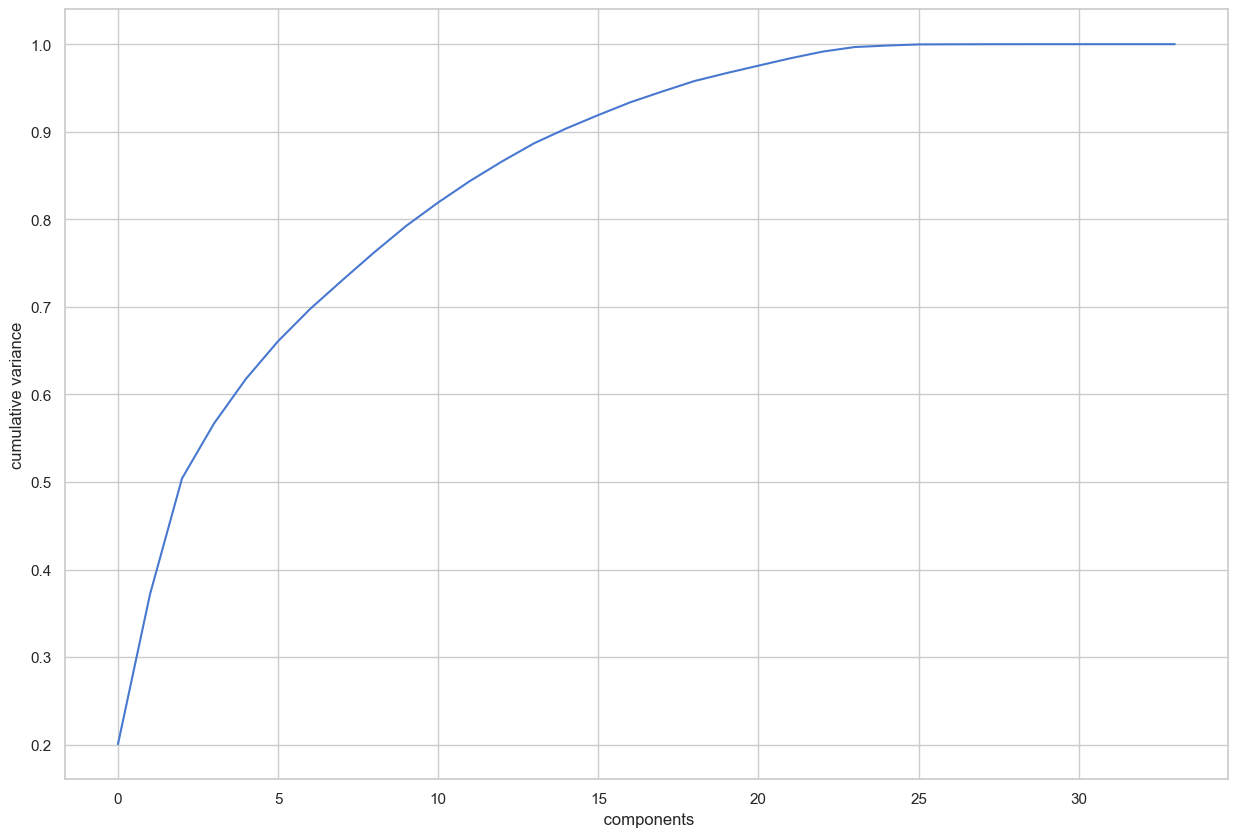

In [23]:
# define pca object
pca = PCA()
# fit the pca model to our data and apply the dimensionality reduction.
Princ_comp = pca.fit_transform(df_scaled[features])

# a dataframe containing the principal components
pca_df = pd.DataFrame(data = Princ_comp)

pca_df['State'] = df['State']

# ploting the linegraph of comulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel(' components')
plt.ylabel('cumulative variance')

### using an arbitrary threshold for the desired variance retained of 85% -  determining how many principal components will be required to explain 85% of the variance in our dataset

In [26]:
pca_85 = PCA(.85)
pca_85.fit_transform(df_scaled[features])
print(round(pca_85.explained_variance_ratio_.sum()*100, 1), '% of the variance explained by', pca_85.n_components_, 'components')


86.6 % of the variance explained by 13 components


### plotting the first components in a 2D scatter plot

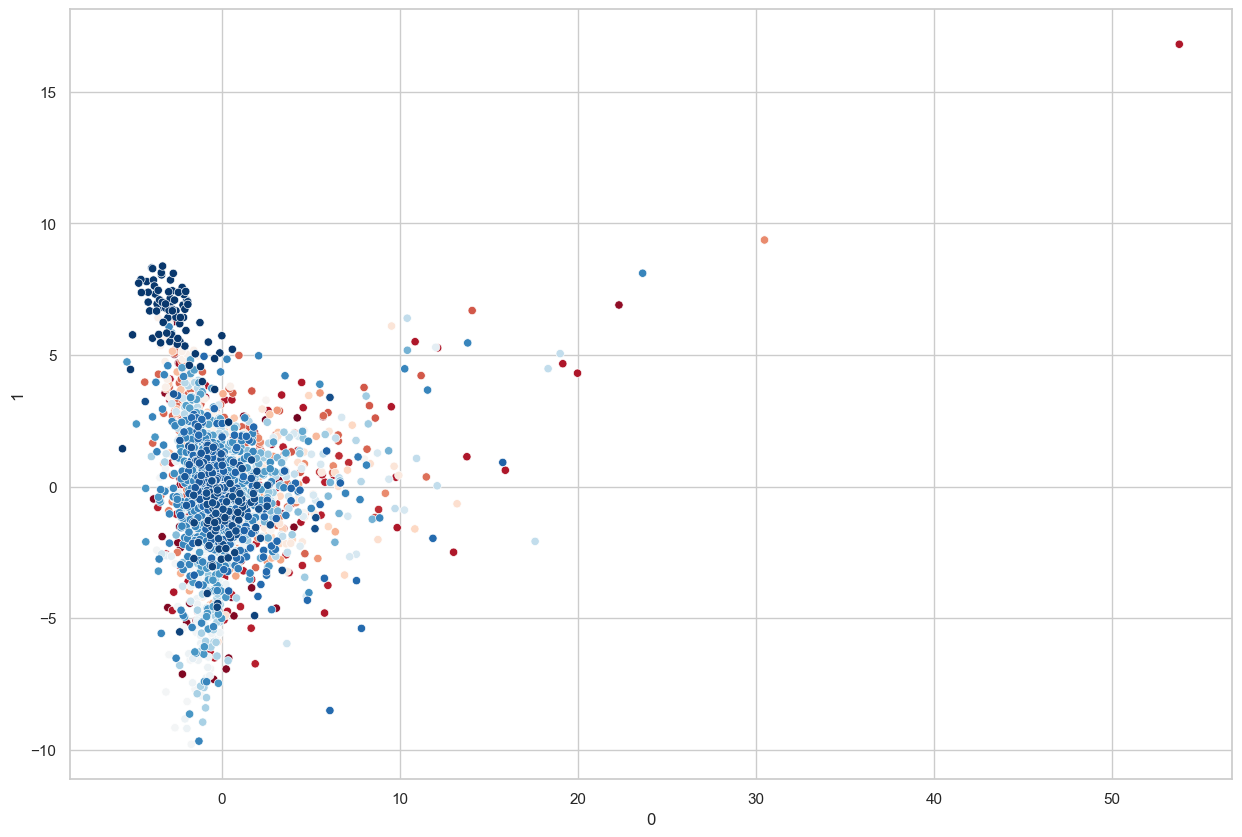

In [31]:
ax = sns.scatterplot(x=pca_df[0], y=pca_df[1],
                    hue="State",
                    palette ="RdBu",
                    data = pca_df,
                    legend = False)
plt.show()

### building a predictive regressor model with `IncomePerCap` as the response variable

In [32]:
#excluding non_features from data
data = df_scaled[features]

#response variable
target = df["IncomePerCap"]

# droping the response variable
data = data.drop(['IncomePerCap'], axis=1)

In [33]:
#spliting our data
X_train, X_test, y_train,y_test = tts(data, target, test_size = 0.2, random_state = 42)


### Applying PCA to our dataset (with 13 components)

In [ ]:
# create PCA object with n_components set to 13
pca_reg = PCA(n_components=13)

# fit the PCA model to our data and apply the dimensionality reduction 
X_train = pca_reg.fit_transform(X_train)

# confirm the number of components
pca_reg.n_components_

In [39]:
# pca object
reg_pca = PCA(n_components = 13)

# fitting the model
X_train = reg_pca.fit_transform(X_train)

reg_pca.n_components_

13

In [38]:
reg_pca.explained_variance_ratio_.sum()

0.870282685321415

In [41]:
X_test = reg_pca.transform(X_test)

### an example of a randon forest model

In [43]:
# initiatting the model
rf = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, random_state = 101)

#training the model
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=101)

In [ ]:
# use the forest's predict method on the test data
predictions = rf.predict(X_test)

# calculate the absolute errors
errors_reg = abs(predictions - y_test)

# print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_reg), 2))

In [45]:
#making predictions using the model on the test data
pred = rf.predict(X_test)

#calculating absolute errors
ab_errors = abs(pred - y_test)

# MAE
print("MAE : ", round(np.mean(ab_errors),2))

MAE :  1746.01


This model is able to predict `IncomePerCap` values with a mean absolute error of around $1700. Is that good? Well, let's take a look at the median income.

In [48]:
target.agg("median")

23457.5

In [49]:
print("Predicts IncomePerCap to within", round((round(np.mean(ab_errors), 2)/target.agg("median"))*100, 1), "% of its value.")

Predicts IncomePerCap to within 7.4 % of its value.


### The median income value is $23,457, which means our model is able to predict to within ~7% of the actual value on average.